# Project 4a: Dispersion Relation for R- and L-Waves in Magnetized Plasmas

In this project, we are going to look at the dispersion relation for electromagnetic waves in a uniform magnetic field.

In this project, you will study the accuracy of the dispersion relation we derived in class for waves that propagate **along** a constant magnetic field. 

In class we began by stating that we are interested in waves with frequencies at or near the plasma frequency so that we can assume the ion motion is not important. We let the magnetic field point in the $\hat x$  direction, $\vec B_0=B_0 \hat x$. We also assume the wave moves in the $\hat x$ direction, $\vec k=k \hat x$. Under these conditions we found that there are two types of waves:

For both waves, $\vec k \parallel \vec B_0$, $\vec E_1 \perp \vec B_0$, and $\vec k \perp \vec E_1$ (transverse waves).  

The dispersion relations are:

$$ \mbox{R-wave}: \quad \frac {c^2k^2}{\omega^2}=1-\frac{\omega_p^2}{\omega^2} \frac{1}{1-\frac{\omega_c}{\omega}} $$

$$ \mbox{L-wave}: \quad \frac {c^2k^2}{\omega^2}=1-\frac{\omega_p^2}{\omega^2} \frac{1}{1+\frac{\omega_c}{\omega}} $$

In this project you will study the spectrum of waves that exist in a magnetized plasma. The constant magnetic field will point in the $x_1$ direction ($\hat x$). You will simulate a uniform plasma in which each plasma electron is initialized with positions (only in $x$ or what we call $x_1$). Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$)=($0.005c$, $0.005c$, $0.005c$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their current and charge density produce:

*	The length of the simulation window is $50 \ c/\omega_p$.
*	The simulation will run for a time $400 \ \ [1/\omega_p] $. 
*	The simulation uses 50,000 particles.

We will have $\omega_c/\omega_p = 0.5$ and $2$.

## R-wave and L-wave dispersion relations

Here you can look at the dispersion relation of the R-wave and L-wave and the frequencies described above.  Just enter $\omega_c$ and $\omega_{p}$ and re-run the cell below:

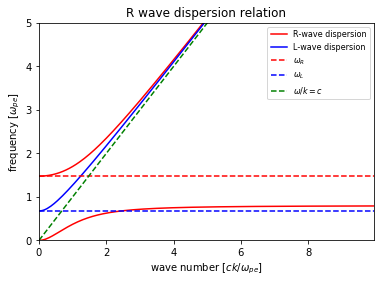

In [1]:
#############
# here we specify the plasma conditions 
wp=1
wc=0.8
#############

from scipy.optimize import fsolve 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#first we define the range of k's of interest, "k" here means "ck"
karray=np.arange(0,10,0.05)
nk=karray.shape[0]

def rwave_disp(w,omegap,omegac,ck):
    ratio=omegac/omegap
    y=(ck*ck)/(omegap*omegap) - (w*w)/(omegap*omegap) + 1/(1-wc/w)
    return y

def lwave_disp(w,omegap,omegac,ck):
    ratio=omegac/omegap
    y=(ck*ck)/(omegap*omegap) - (w*w)/(omegap*omegap) + 1/(1+wc/w)
    return y

wR=0.5*(wc+np.sqrt(4*wp*wp+wc*wc))
wL=0.5*(np.sqrt(4*wp*wp+wc*wc)-wc)

warrayL=np.zeros(karray.shape[0]); warrayR1=np.zeros(karray.shape[0]); warrayR2=np.zeros(karray.shape[0]);
wLarray=np.zeros(karray.shape[0]); wR1array=np.zeros(karray.shape[0]); wR2array=np.zeros(karray.shape[0]); 
#wHarray=np.zeros(karray.shape[0])

wLarray[:]=wL
wR1array[:]=0.01
wR2array[:]=wR
#wHarray[:]=np.sqrt(wp*wp+wc*wc)

warrayL[0]=wL
warrayR1[0]=0.01
warrayR2[0]=wR
for ik in range(1,nk):
    warrayR2[ik]=fsolve(rwave_disp,warrayR2[ik-1],args=(wp,wc,karray[ik]))
    warrayR1[ik]=fsolve(rwave_disp,warrayR1[ik-1],args=(wp,wc,karray[ik]))
    warrayL[ik]=fsolve(lwave_disp,warrayL[ik-1],args=(wp,wc,karray[ik]))

plt.plot(karray,warrayR1,'r',label='R-wave dispersion')
plt.plot(karray,warrayR2,'r')
plt.plot(karray,warrayL,'b',label='L-wave dispersion')
plt.plot(karray,wR2array,'r--',label='$\omega_R$')
plt.plot(karray,wLarray,'b--',label='$\omega_L$')
plt.plot(karray, karray,'g--',label='$\omega/k=c$')
plt.xlabel('wave number $[ck/\omega_{pe}]$')
plt.ylabel('frequency $[\omega_{pe}]$')
plt.title('R wave dispersion relation')
plt.legend()
plt.xlim([karray[0],karray[nk-1]])
plt.ylim([0,5])#karray[nk-1]+1.0])
plt.legend(loc=0, fontsize=8)
plt.show()

# Simulations with a Particle-in-Cell Code

In this project you simulate plasmas with similar conditions as in Project 1a, 2a, and 3a.

Each plasma electron is initialized with positions (only in $x$ or what we call $x_1$) such that the density is uniform. The ions are initialized at the same positions but they have an infinite mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their current and charge density produce.

* The length of the plasmas is 50 $c/\omega_p$
* The simulation will run for a time 400 $1/\omega_p$.
* The simulation uses 50,000 particles.

You will be looking at plots of the electric field in the $x_1$ and $x_2$ directions ($E_1$ and $E_2$), which correspond to R- and L-waves.  You will also be looking at electric fields in the $x_1$ direction ($E_1$) which correspond to fundamental plasma oscillations.

### The following lines must always be executed before running anything else.

Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar

In [ ]:
import osiris
%matplotlib inline

## Run cases in which $\Omega_{ce} = 0.5 \omega_{pe}$ and $2.0 \omega_{pe}$.

In [ ]:
dirname = 'therm-b05-rl'
osiris.runosiris(rundir=dirname,inputfile='therm-b05-rl.txt')

In [ ]:
dirname = 'therm-b20-rl'
osiris.runosiris(rundir=dirname,inputfile='therm-b20-rl.txt')

## Case for which $\Omega_{ce} = 0.5 \omega_{pe}$.

After the simulation is finished, plot $E_3(x_1)$ at $t \approx 100$ (run the next cell). 
* Do you see any evidence of a coherent wave?
* Does the plot make sense?

In [ ]:
dirname = 'therm-b05-rl'
osiris.field(rundir=dirname, dataset='e2', time=100)

Next, plot $E_3(t)$ at $x_1=5 c/\omega_p$ (i.e., at cell=100). 
* Do you see any evidence of a coherent wave? 
* Does the plot make sense?

In [ ]:
dirname = 'therm-b05-rl'
osiris.field(rundir=dirname, dataset='e2', space=100)

Next, in the following two cells, we are going to plot $\omega(k)$.  This is generated by taking $E_3(x_1,t)$ and Fourier analyzing in both position and time.

-------
* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

In [ ]:
dirname = 'therm-b05-rl'
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,15], vth = 0.1, b0_mag=0.5, vmin=-5, vmax=2, plot_or=3) 
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,15], vth = 0.1, b0_mag=0.5, vmin=-5, vmax=2, plot_or=3, 
               show_theory=True) 

* Do these plots make sense?

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

In [ ]:
dirname = 'therm-b05-rl'
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=-5, vmax=2, vth = 0.02, b0_mag=0.5, plot_or=2) 
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=-5, vmax=2, vth = 0.02, b0_mag=0.5, plot_or=2, 
               show_theory=True) 

* Why do the plots for $E_2$ and $E_3$ look similar?

In [ ]:
dirname = 'therm-b05-rl'
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=-5, vmax=2, vth=0.02, b0_mag=0.5, plot_or=1) 
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=-5, vmax=2, vth=0.02, b0_mag=0.5, plot_or=1, 
               show_theory=True) 

* Why is this curve nearly $\omega$=$\omega_p$?
* The curve bends down for large $kc/\omega_p$ because of numerical not physical reasons. So it should actually look like the Bohm-Gross dispersion relation.


## Case for which $\Omega_{ce} = 2.0 \omega_{pe}$.

In [ ]:
dirname = 'therm-b20-rl'
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=-5, vmax=2, vth = 0.1, b0_mag=2.0, plot_or=3) 
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=-5, vmax=2, vth = 0.1, b0_mag=2.0, plot_or=3, 
               show_theory=True) 

* Which mode has phase velocities closer to the speed of light?

In [ ]:
dirname = 'therm-b20-rl'
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=-5, vmax=2, vth=0.02, b0_mag=2.0, plot_or=2) 
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,15], vmin=-5, vmax=2, vth=0.02, b0_mag=2.0, plot_or=2, 
               show_theory=True) 

* Is $\omega_R$ larger than $\omega_L$ in all cases?

In [ ]:
dirname = 'therm-b20-rl'
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=-5, vmax=2, vth = 0.005, b0_mag=2.0, plot_or=1) 
osiris.plot_wk_rl(rundir=dirname, wlim=[0,5], klim=[0,25], vmin=-5, vmax=2, vth = 0.005, b0_mag=2.0, plot_or=1, 
               show_theory=True) 

* What are you learning about the behavior of curves near the resonces?